# code, data, and visuaization - building blocks


### intro

* notebooks are an awesome tool for fast, interactive research.
* but once I've hacked on some data and discovered something useful,
* I don't know a good way to freeze that example and publish my results on the web.


### inspiration

* the python world does have the ipython notebook viewer
  * but the lack of a building block standard makes finding
  * and re-using code slow and unreliable
  
  
* I'm looking more towards [bl.ocks.org](http://bl.ocks.org/mbostock) and
  * the awesome open source community that builds d3.sj


### long term, I want solutions for:

* how to correctly export notebooks for the web (and make sharing NPI safe)

* where to deploy/host a researh building block

* setting the right tone and level of formality
  * create templates & examples for knowledge build blocks
  * include placeholders for stages of the scientific method

* help users to be explicit about what their work is testing
  * or if their research is not goal oriented, to talk
  * about the what and why of their exploration

--------------------------------------------------------------------------------

## short term, I want to:


## transform this notebook


* into a web accessable building block of knowledge,
* without screwing up the primary repository the notebook lives in.


## make a typical notebook

and do a typical firt-pass on some data.

* do a getting-to-know-you", type scan over the data:
  * look at a sample
  * look at available metadata
  * basic counts
  * basic plots
  

In [1]:
import io

import IPython.display
import pandas as pd
import requests

In [2]:
%matplotlib inline

In [3]:
# path config - data url
url = r'https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv'

get data from the web
------------------------

* pulling web data into pandas w/o a temp file?
  * [demo](http://stackoverflow.com/questions/32400867/pandas-read-csv-from-url/32400969#32400969)

In [4]:
# get the web data
returned_request = requests.get(url).content

# parse and read the data into pandas
df = pd.read_csv(io.StringIO(returned_request.decode('utf-8')))

look at the data
---------------

* look at metadata
* examine a sample of records by hand
* make some basic plots

In [5]:
# metadata!
df.columns

Index([u'Country', u'Region'], dtype='object')

In [6]:
# examine a sample
df.head()

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


In [7]:
df.describe(include='all')

,Country,Region
count,194,194
unique,194,6
top,Vatican City,AFRICA
freq,1,54


let's dig a little deeper into the data
-------------------------------------

* and get some basic plots going

In [8]:
IPython.display.display(df.Country.value_counts().head())
IPython.display.display(df.Country.value_counts().describe())

Vatican City     1
Iraq             1
Macedonia        1
Guinea-Bissau    1
Venezuela        1
Name: Country, dtype: int64

count    194
mean       1
std        0
min        1
25%        1
50%        1
75%        1
max        1
Name: Country, dtype: float64

### these stats imply that Country may be a primary key on this table

* region looks more interesting

AFRICA           54
EUROPE           47
ASIA             44
NORTH AMERICA    23
OCEANIA          14
SOUTH AMERICA    12
Name: Region, dtype: int64

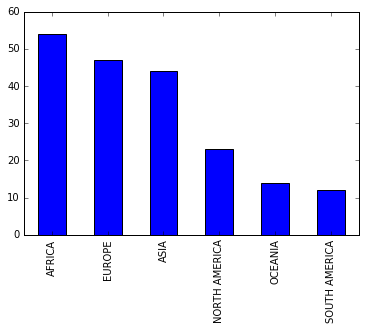

In [9]:
IPython.display.display(df.Region.value_counts())
IPython.display.display(df.Region.value_counts().plot(kind='bar'))

## let's wrap up

* that should do it for content you'd see in a typical notebook
* we'll see if it renders